In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from random import sample
import random

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
!unzip archive.zip -d images/


Archive:  archive.zip
  inflating: images/README           
  inflating: images/s1/1.pgm         
  inflating: images/s1/10.pgm        
  inflating: images/s1/2.pgm         
  inflating: images/s1/3.pgm         
  inflating: images/s1/4.pgm         
  inflating: images/s1/5.pgm         
  inflating: images/s1/6.pgm         
  inflating: images/s1/7.pgm         
  inflating: images/s1/8.pgm         
  inflating: images/s1/9.pgm         
  inflating: images/s10/1.pgm        
  inflating: images/s10/10.pgm       
  inflating: images/s10/2.pgm        
  inflating: images/s10/3.pgm        
  inflating: images/s10/4.pgm        
  inflating: images/s10/5.pgm        
  inflating: images/s10/6.pgm        
  inflating: images/s10/7.pgm        
  inflating: images/s10/8.pgm        
  inflating: images/s10/9.pgm        
  inflating: images/s11/1.pgm        
  inflating: images/s11/10.pgm       
  inflating: images/s11/2.pgm        
  inflating: images/s11/3.pgm        
  inflating: images/s11/4.pg

In [ ]:
#%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [ ]:
!ls /mydrive/pattern-recognition

non-face-resized.zip


In [ ]:
!unzip /mydrive/pattern-recognition/non-face-resized -d images2/


Archive:  /mydrive/pattern-recognition/non-face-resized.zip
   creating: images2/non-face-resized/
  inflating: images2/non-face-resized/frame1.jpg  
  inflating: images2/non-face-resized/frame10.jpg  
  inflating: images2/non-face-resized/frame100.jpg  
  inflating: images2/non-face-resized/frame101.jpg  
  inflating: images2/non-face-resized/frame102.jpg  
  inflating: images2/non-face-resized/frame103.jpg  
  inflating: images2/non-face-resized/frame104.jpg  
  inflating: images2/non-face-resized/frame105.jpg  
  inflating: images2/non-face-resized/frame106.jpg  
  inflating: images2/non-face-resized/frame107.jpg  
  inflating: images2/non-face-resized/frame108.jpg  
  inflating: images2/non-face-resized/frame109.jpg  
  inflating: images2/non-face-resized/frame11.jpg  
  inflating: images2/non-face-resized/frame110.jpg  
  inflating: images2/non-face-resized/frame111.jpg  
  inflating: images2/non-face-resized/frame112.jpg  
  inflating: images2/non-face-resized/frame113.jpg  
  in

In [ ]:
!ls images2/non-face-resized/


frame100.jpg  frame173.jpg  frame245.jpg  frame317.jpg	frame38.jpg
frame101.jpg  frame174.jpg  frame246.jpg  frame318.jpg	frame390.jpg
frame102.jpg  frame175.jpg  frame247.jpg  frame319.jpg	frame391.jpg
frame103.jpg  frame176.jpg  frame248.jpg  frame31.jpg	frame392.jpg
frame104.jpg  frame177.jpg  frame249.jpg  frame320.jpg	frame393.jpg
frame105.jpg  frame178.jpg  frame24.jpg   frame321.jpg	frame394.jpg
frame106.jpg  frame179.jpg  frame250.jpg  frame322.jpg	frame395.jpg
frame107.jpg  frame17.jpg   frame251.jpg  frame323.jpg	frame396.jpg
frame108.jpg  frame180.jpg  frame252.jpg  frame324.jpg	frame397.jpg
frame109.jpg  frame181.jpg  frame253.jpg  frame325.jpg	frame398.jpg
frame10.jpg   frame182.jpg  frame254.jpg  frame326.jpg	frame399.jpg
frame110.jpg  frame183.jpg  frame255.jpg  frame327.jpg	frame39.jpg
frame111.jpg  frame184.jpg  frame256.jpg  frame328.jpg	frame3.jpg
frame112.jpg  frame185.jpg  frame257.jpg  frame329.jpg	frame400.jpg
frame113.jpg  frame186.jpg  frame258.jpg  frame32.jpg

In [ ]:
directory_faces = 'images/'
image_vectors = []

for folder in os.listdir(directory_faces):
  path = os.path.join(directory_faces, folder)
  if os.path.isdir(path):
    sub_directory = path
    for image in os.listdir(sub_directory):
            f = os.path.join(sub_directory, image)
            # The function imread loads an image from the specified file and returns it
            img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
            vector = np.array(img)
            result = vector.flatten()
            image_vectors.append(result)
 

In [ ]:
directory_non_faces = 'images2/non-face-resized'
for image in os.listdir(directory_non_faces):
  f = os.path.join(directory_non_faces, image)
  img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
  vector = np.array(img)
  result = vector.flatten()
  image_vectors.append(result)

In [ ]:
image_vectors = np.array(image_vectors)
image_vectors.shape 

(800, 10304)

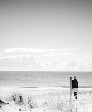

In [ ]:
cv2_imshow(img)

In [ ]:
labels = []

for i in range (0,401):
    labels.append(0)

for i in range(401, 800):
    labels.append(1)



labels = np.array(labels)
len(labels)

800

In [ ]:
train_data = []
test_data = []
train_labels = []
test_labels = []

for i in range(0,800):
    if(i%2 ==  0 ): 
        test_data.append(image_vectors[i])
        test_labels.append(labels[i])
    
    else:
        train_data.append(image_vectors[i])
        train_labels.append(labels[i])
    
train_data = np.array(train_data)   
test_data = np.array(test_data)    
train_labels = np.array(train_labels)    
test_labels = np.array(test_labels)    

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)


(400, 10304)
(400, 10304)
(400,)
(400,)


In [ ]:
def get_reduced_dim_mat(dimensions, matrix):
  projection_matrix_r = np.delete(train_eigen_vecs, np.s_[int(dimensions) : train_eigen_vecs.shape[1]], axis=1)
  reduced_dim_mat = np.dot(np.transpose(projection_matrix_r),np.transpose(matrix)) 
  reduced_dim_mat = np.transpose(reduced_dim_mat)

  return reduced_dim_mat

In [ ]:
def KNNclf(neighbours, X_train, y_train, X_test, y_test):
  clf = KNeighborsClassifier(n_neighbors=neighbours)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Correct labels are:")
  print(y_test)
  print("Predicted labels are:")
  print(y_pred)
  print("Accuracy: ", accuracy)
  #print(confusion_matrix(y_test, y_pred))
  #print(classification_report(y_test, y_pred))
  return accuracy

In [ ]:
alphaaa = np.array([0.8,0.85,0.9,0.95])

In [ ]:
train_data_mean = np.mean(train_data,axis=0)
print(train_data_mean)

[104.9125 105.045  105.73   ...  74.5525  74.16    73.5725]


In [ ]:
train_data_mean.shape

(10304,)

In [ ]:
Centered_Train_Data_Matrix = train_data - np.transpose(train_data_mean)
print(Centered_Train_Data_Matrix)
print(Centered_Train_Data_Matrix.shape)

[[-65.9125 -61.045  -52.73   ... -45.5525 -48.16   -44.5725]
 [-56.9125 -56.045  -60.73   ... -27.5525 -28.16   -27.5725]
 [-60.9125 -62.045  -73.73   ... -31.5525 -31.16   -36.5725]
 ...
 [ 56.0875  53.955   73.27   ... 126.4475 123.84   124.4275]
 [144.0875 147.955  147.27   ... 179.4475 179.84   177.4275]
 [ 10.0875   9.955   10.27   ... 173.4475 146.84   170.4275]]
(400, 10304)


In [ ]:
Train_Covariance_Matrix = np.dot(np.transpose(Centered_Train_Data_Matrix),Centered_Train_Data_Matrix)/Centered_Train_Data_Matrix.shape[0]
print(Train_Covariance_Matrix)

[[3705.43984375 3665.0214375  3655.548875   ...  852.54084375
   872.424       893.54259375]
 [3665.0214375  3701.372975   3682.33465    ...  838.6976375
   848.0703      867.1492375 ]
 [3655.548875   3682.33465    3723.3971     ...  821.301675
   868.3407      894.927075  ]
 ...
 [ 852.54084375  838.6976375   821.301675   ... 3236.76224375
  2979.6341     2801.04869375]
 [ 872.424       848.0703      868.3407     ... 2979.6341
  3175.5444     2905.6909    ]
 [ 893.54259375  867.1492375   894.927075   ... 2801.04869375
  2905.6909     3150.15974375]]


In [ ]:
cov_mat = np.cov(np.transpose(train_data), bias=True)
print(cov_mat)
print(cov_mat.shape)
print(Train_Covariance_Matrix.shape)

[[3705.43984375 3665.0214375  3655.548875   ...  852.54084375
   872.424       893.54259375]
 [3665.0214375  3701.372975   3682.33465    ...  838.6976375
   848.0703      867.1492375 ]
 [3655.548875   3682.33465    3723.3971     ...  821.301675
   868.3407      894.927075  ]
 ...
 [ 852.54084375  838.6976375   821.301675   ... 3236.76224375
  2979.6341     2801.04869375]
 [ 872.424       848.0703      868.3407     ... 2979.6341
  3175.5444     2905.6909    ]
 [ 893.54259375  867.1492375   894.927075   ... 2801.04869375
  2905.6909     3150.15974375]]
(10304, 10304)
(10304, 10304)


In [ ]:
try:
  np.testing.assert_array_equal(cov_mat, Train_Covariance_Matrix)
except AssertionError as e:
  print(e)


Arrays are not equal

Mismatched elements: 14383835 / 106172416 (13.5%)
Max absolute difference: 9.09494702e-13
Max relative difference: 2.22044605e-16
 x: array([[3705.439844, 3665.021437, 3655.548875, ...,  852.540844,
         872.424   ,  893.542594],
       [3665.021437, 3701.372975, 3682.33465 , ...,  838.697637,...
 y: array([[3705.439844, 3665.021437, 3655.548875, ...,  852.540844,
         872.424   ,  893.542594],
       [3665.021437, 3701.372975, 3682.33465 , ...,  838.697637,...


In [ ]:
train_eigen_vals, train_eigen_vecs = LA.eigh(Train_Covariance_Matrix)
idx = train_eigen_vals.argsort()[::-1]   
train_eigen_vals = train_eigen_vals[idx]
train_eigen_vecs = train_eigen_vecs[:,idx]
print(train_eigen_vals)
print(train_eigen_vecs)

[ 7.40782988e+06  4.82457068e+06  2.25324300e+06 ... -2.40789937e-09
 -2.52146845e-09 -4.67411165e-09]
[[ 0.01392463 -0.00362344  0.01696366 ...  0.          0.
   0.        ]
 [ 0.01416199 -0.00364141  0.01632985 ...  0.04659731  0.02669531
   0.4280951 ]
 [ 0.01431051 -0.00357428  0.01647154 ... -0.00215188 -0.52776899
  -0.14743541]
 ...
 [ 0.00436418  0.00720789  0.01794976 ...  0.00842207  0.01372168
  -0.0057341 ]
 [ 0.00391967  0.00745812  0.01898317 ...  0.00186113  0.00574614
   0.0045054 ]
 [ 0.00376756  0.00731701  0.01851467 ... -0.00901422 -0.00920342
   0.01718666]]


In [ ]:
train_eigen_values_total = np.sum(train_eigen_vals)

print("\nSum of  Eigen Values= ",train_eigen_values_total,"\n")
num_of_dim = np.empty(len(alphaaa),)
k = 0
for alpha in alphaaa:
  sum = 0
  r = 0
  while sum < alpha * train_eigen_values_total:
        sum += train_eigen_vals[r]
        r += 1
  num_of_dim[k] = r
  print("Explained variance for alpha = " + str(alpha) + " is " + str(num_of_dim[k]) + " dimensions")
  k += 1



Sum of  Eigen Values=  30476876.297362484 

Explained variance for alpha = 0.8 is 36.0 dimensions
Explained variance for alpha = 0.85 is 60.0 dimensions
Explained variance for alpha = 0.9 is 99.0 dimensions
Explained variance for alpha = 0.95 is 172.0 dimensions


In [ ]:
k_neighbours = [1, 3, 5, 7]
accuracies = np.empty((len(alphaaa), len(k_neighbours)))
print(accuracies.shape)

for alpha , dim in enumerate(num_of_dim):
  X_train = get_reduced_dim_mat(dim, train_data - np.transpose(train_data_mean))
  X_test = get_reduced_dim_mat(dim, test_data - np.transpose(train_data_mean))
  y_train = train_labels
  y_test = test_labels
  for neighbour, k in enumerate(k_neighbours):
    print(str(int(dim)) + " dimensions with " + str(k) + " nearest neighbours")
    accuracy = KNNclf(k, X_train, y_train, X_test, y_test)
    accuracies[alpha][neighbour] = accuracy
accuracies = np.transpose(accuracies)


(4, 4)
36 dimensions with 1 nearest neighbours
Correct labels are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted labels are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
print(accuracies[alpha].shape)

(4,)


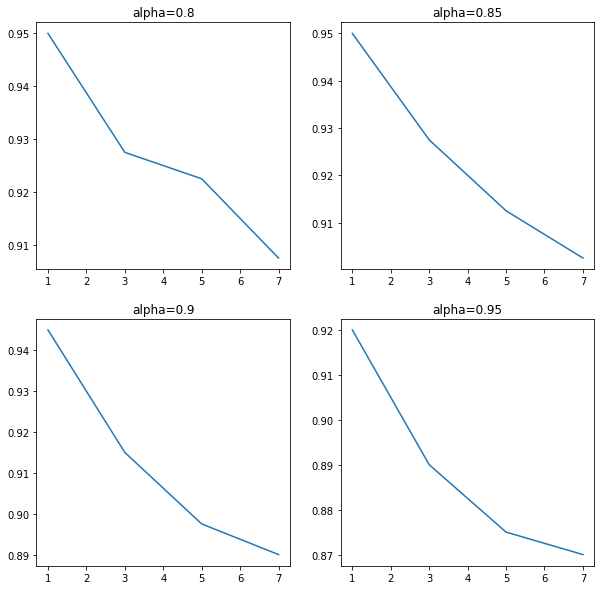

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(len(alphaaa)):
  plt.subplot(2, 2, i+1)
  plt.title("alpha=" + str(alphaaa[i]))
  plt.plot(k_neighbours, accuracies.T[i])

[0.8  0.85 0.9  0.95]
[[0.95   0.95   0.945  0.92  ]
 [0.9275 0.9275 0.915  0.89  ]
 [0.9225 0.9125 0.8975 0.875 ]
 [0.9075 0.9025 0.89   0.87  ]]


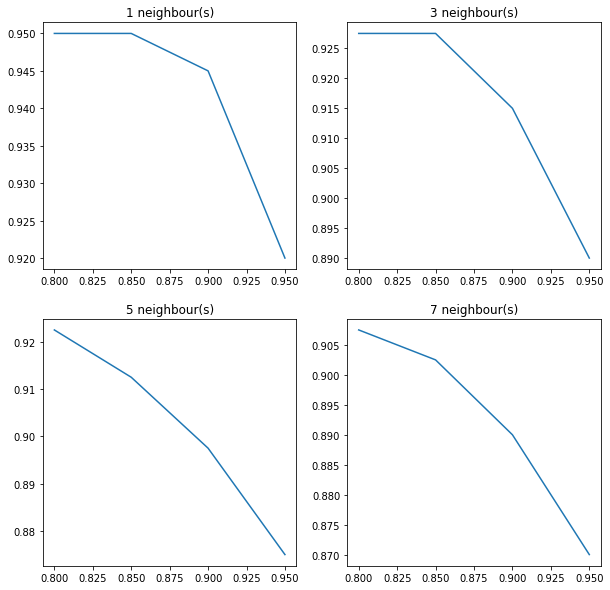

In [ ]:
print(alphaaa)
print(accuracies)
plt.figure(figsize=(10, 10))

for i in range(len(k_neighbours)):
  plt.subplot(2, 2, i+1)
  plt.title(str(k_neighbours[i]) + " neighbour(s)")
  plt.plot(alphaaa, accuracies[i])


In [ ]:
n = 400
LDA_mean_0 = np.zeros((1,train_data.shape[1]))
LDA_mean_1 = np.zeros((1,train_data.shape[1]))

LDA_mean_0 = np.mean( train_data[0:200,:],  axis = 0 )
LDA_mean_1 = np.mean( train_data[201:400,:],  axis = 0 )


mu_sub = LDA_mean_0 - LDA_mean_1

B = np.dot(mu_sub.T, mu_sub)

print(train_data.shape)


(400, 10304)


In [ ]:
LDA_Centered_Data_Matrix = np.zeros((train_data.shape[0],train_data.shape[1]))

for i in range(0,201,1):
  LDA_Centered_Data_Matrix[i,:] = train_data[i,:] - LDA_mean_0

for i in range(201,400,1):
  LDA_Centered_Data_Matrix[i,:] = train_data[i,:] - LDA_mean_1

  
print(LDA_Centered_Data_Matrix)   
print(LDA_Centered_Data_Matrix.shape)

LDA_Centered_Data_Matrix40 = np.empty((2, n, 10304))
for i in range(0, train_data.shape[0], n):
   print(i//n,"\t",i,"\t",i+n)
   LDA_Centered_Data_Matrix40[i//n] = LDA_Centered_Data_Matrix[i:i+n,:]

print("Center Class matrices: \n",LDA_Centered_Data_Matrix40,"\n") 

S = np.empty((10304,10304))


for i in range(0,2,1):
  S += np.dot(np.transpose(LDA_Centered_Data_Matrix40[i]),LDA_Centered_Data_Matrix40[i])

print(S)
print("\nS dims:",S.shape)


[[-46.33       -41.31       -32.67       ... -46.175      -49.02
  -43.925     ]
 [-37.33       -36.31       -40.67       ... -28.175      -29.02
  -26.925     ]
 [-41.33       -42.31       -53.67       ... -32.175      -32.02
  -35.925     ]
 ...
 [ 36.46733668  34.19095477  53.18592965 ... 127.40201005 124.74371859
  123.67839196]
 [124.46733668 128.19095477 127.18592965 ... 180.40201005 180.74371859
  176.67839196]
 [ -9.53266332  -9.80904523  -9.81407035 ... 174.40201005 147.74371859
  169.67839196]]
(400, 10304)
0 	 0 	 400
Center Class matrices: 
 [[[-4.63300000e+01 -4.13100000e+01 -3.26700000e+01 ... -4.61750000e+01
   -4.90200000e+01 -4.39250000e+01]
  [-3.73300000e+01 -3.63100000e+01 -4.06700000e+01 ... -2.81750000e+01
   -2.90200000e+01 -2.69250000e+01]
  [-4.13300000e+01 -4.23100000e+01 -5.36700000e+01 ... -3.21750000e+01
   -3.20200000e+01 -3.59250000e+01]
  ...
  [ 3.64673367e+01  3.41909548e+01  5.31859296e+01 ...  1.27402010e+02
    1.24743719e+02  1.23678392e+02]
  [ 1.

In [ ]:
print(np.allclose(S.transpose(),S))

False


In [ ]:
"""
fixed_S = (np.triu_indices(len(S),1))
S[fixed_S] = np.transpose(np.tril(S,-1))[fixed_S]
print(np.allclose(S.transpose(),S))
print(S)
"""

'\nfixed_S = (np.triu_indices(len(S),1))\nS[fixed_S] = np.transpose(np.tril(S,-1))[fixed_S]\nprint(np.allclose(S.transpose(),S))\nprint(S)\n'

In [ ]:
S_inv=np.linalg.inv(S)
print(S_inv.shape)
print("\n",S_inv)

(10304, 10304)

 [[ 22.30053115 -30.28772851 -24.67349041 ...   0.72593331  -1.8207061
    5.41637443]
 [-19.09394405  25.88178023  22.40763406 ...  -1.70574397   0.28894651
   -2.05058785]
 [-33.40863754  32.48509866  27.68358881 ...   2.43678482   4.86907924
  -14.89715878]
 ...
 [ -0.66901488  -1.96633317  -2.31457943 ...   0.95425575  -0.76412185
    0.6822402 ]
 [ -0.30743539   0.65630565   4.30979255 ...  -0.46332367   0.98137785
   -1.01964862]
 [ 18.82730395 -23.47237458 -12.51908294 ...  -0.61061367  -0.43706929
    5.61199477]]


In [ ]:
"""
fixed_S_inv = (np.triu_indices(len(S_inv),1))
S_inv[fixed_S_inv] = np.transpose(np.tril(S_inv,-1))[fixed_S_inv]
print((np.transpose(S_inv)== S_inv).all())
print(S_inv)
print(B)
SB=np.dot(S_inv,B)
print(SB)
print(SB.shape)
"""

'\nfixed_S_inv = (np.triu_indices(len(S_inv),1))\nS_inv[fixed_S_inv] = np.transpose(np.tril(S_inv,-1))[fixed_S_inv]\nprint((np.transpose(S_inv)== S_inv).all())\nprint(S_inv)\nprint(B)\nSB=np.dot(S_inv,B)\nprint(SB)\nprint(SB.shape)\n'

In [ ]:
SB = np.dot(S_inv,B)

In [ ]:
S_eigenvals, S_eigenvecs = LA.eigh(SB)
idx = S_eigenvals.argsort()[::-1]   
eigenvals = S_eigenvals[idx]
eigenvecs = S_eigenvecs[:,idx]
print(S_eigenvals)
print(S_eigenvals.shape)
print(S_eigenvecs)
print(S_eigenvecs.shape)
projection_matrix = S_eigenvecs[:,0:40]
print(projection_matrix)
print(projection_matrix.shape)

[-5.08900074e+10 -1.83321852e+10 -1.44228488e+10 ...  1.44156351e+10
  1.83663938e+10  5.05664865e+10]
(10304,)
[[ 1.33489437e-01 -7.00513876e-02  9.62312551e-05 ... -1.27498066e-02
   7.66475686e-02  1.38218665e-01]
 [-1.57616975e-01  8.80310003e-02  2.02042258e-02 ...  2.99967979e-02
  -9.35773780e-02 -1.62321980e-01]
 [-1.31631345e-01  6.51384608e-02  7.60524086e-02 ...  8.74124018e-02
  -7.11955907e-02 -1.37121998e-01]
 ...
 [-2.04237902e-03 -2.90303789e-03 -1.46521790e-03 ...  1.89630537e-03
  -2.58473359e-03  2.01702194e-03]
 [ 1.10503282e-03  1.97516310e-03 -3.02974114e-03 ...  2.82125994e-03
   1.88678774e-03 -1.00098117e-03]
 [-1.69770481e-02 -1.89438626e-02 -1.16195305e-02 ...  1.33242608e-02
  -1.88336883e-02  1.73856916e-02]]
(10304, 10304)
[[ 1.33489437e-01 -7.00513876e-02  9.62312551e-05 ... -2.68200873e-02
   4.76334539e-02 -2.62333647e-02]
 [-1.57616975e-01  8.80310003e-02  2.02042258e-02 ... -3.39384686e-02
  -1.40476763e-02 -1.28822074e-02]
 [-1.31631345e-01  6.513846

In [ ]:
projection_matrix = eigenvecs[:,0:39]
print(projection_matrix)
print(projection_matrix.shape)

[[ 0.13821867  0.07664757 -0.01274981 ...  0.07258083 -0.05109595
   0.00706614]
 [-0.16232198 -0.09357738  0.0299968  ...  0.06937102 -0.06783499
   0.02214626]
 [-0.137122   -0.07119559  0.0874124  ... -0.22694327  0.08254525
  -0.07822123]
 ...
 [ 0.00201702 -0.00258473  0.00189631 ... -0.00930851  0.01088475
  -0.00838212]
 [-0.00100098  0.00188679  0.00282126 ...  0.00045696 -0.00054039
   0.00091753]
 [ 0.01738569 -0.01883369  0.01332426 ...  0.03270658  0.0152224
  -0.02716305]]
(10304, 39)


In [ ]:
test_LDA =np.dot(np.transpose(projection_matrix),np.transpose(test_data))
test_LDA = np.transpose(test_LDA)
print("Reduced Data Matrix\n",test_LDA)
print("Reduced Data Matrix Dimensions\n",test_LDA.shape)
train_LDA=np.dot(np.transpose(projection_matrix),np.transpose(train_data))
train_LDA = np.transpose(train_LDA)

Reduced Data Matrix
 [[-17.33504097   3.41882113  -9.2135258  ...  -1.57065959  12.0953333
   -2.17318395]
 [  0.19229537  -0.44211289   3.91037749 ...  -0.75483455  13.41103065
   19.73228035]
 [-24.43557139  14.12233051 -17.1340807  ...  27.89810409 -25.69628037
  -19.05451949]
 ...
 [-24.24956142  16.71068935 -29.05692071 ... -23.47806997  25.48574545
   39.5075465 ]
 [ 10.66551677  23.193718   -15.62852452 ...  31.37169795  49.65250711
   -8.29017497]
 [ 28.33876782 -23.00716925 -27.61312641 ...  32.77752573  13.39425846
   46.77653165]]
Reduced Data Matrix Dimensions
 (400, 39)


In [ ]:
X_train = train_LDA
X_test = test_LDA
y_train=train_labels
y_test=test_labels
print("Train Data Dimensions:",train_LDA.shape)
print("Test Data Dimensions:",test_LDA.shape)


Train Data Dimensions: (400, 39)
Test Data Dimensions: (400, 39)


In [ ]:
k_neighbours = [1, 3, 5, 7]
accuracies_LDA = np.empty( (len(k_neighbours),))



for i, k in enumerate(k_neighbours):
  print(str(k) + " nearest neighbours")
  accuracy = KNNclf(k, X_train, y_train, X_test, y_test)
  accuracies_LDA[i] = accuracy
  print(" ")


accuracies_LDA = np.transpose(accuracies_LDA)
accuracies_LDA

1 nearest neighbours
Correct labels are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted labels are:
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

array([0.7925, 0.8125, 0.8   , 0.79  ])

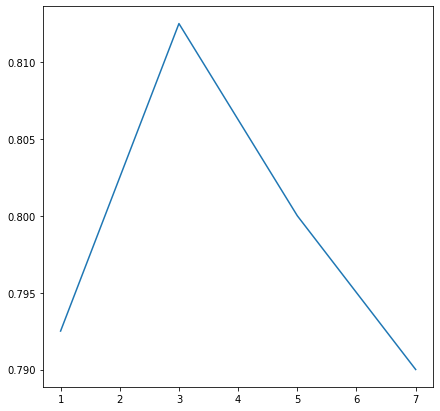

In [ ]:
plt.figure(figsize=(7, 7))

plt.plot(k_neighbours, accuracies_LDA)

